## 이미지 분류 준비

### 데이터 준비

data/
    train/
        cats/
        dogs/
        girls/
    validation/
        cats/
        dogs/
        girls/

### 라이브러리 로드

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [15]:
# 디렉토리 경로 설정
base_dir = 'archive/imageclass'
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/validation'

In [16]:
# 이미지 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# 데이터셋 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 2398 images belonging to 3 classes.


In [18]:
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 600 images belonging to 3 classes.


In [19]:
#  CNN 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

# Print out model summary
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,680,067 (36.93 MB)

 Trainable params: 9,680,067 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)



Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 392ms/step - accuracy: 0.4077 - loss: 1.0713 - val_accuracy: 0.5650 - val_loss: 0.8599
Epoch 2/30


2024-06-03 02:48:42.728086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 20/100 ━━━━━━━━━━━━━━━━━━━━ 27s 349ms/step - accuracy: 0.5240 - loss: 0.9234

2024-06-03 02:48:49.735008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.5288 - loss: 0.9209 - val_accuracy: 0.5700 - val_loss: 0.8534
Epoch 3/30


2024-06-03 02:48:52.745299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 416ms/step - accuracy: 0.5490 - loss: 0.9010 - val_accuracy: 0.5950 - val_loss: 0.8408
Epoch 4/30


2024-06-03 02:49:35.334179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 29s 367ms/step - accuracy: 0.5050 - loss: 0.9137

2024-06-03 02:49:42.694662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.5350 - loss: 0.9054 - val_accuracy: 0.5517 - val_loss: 0.9090
Epoch 5/30


2024-06-03 02:49:45.928830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 439ms/step - accuracy: 0.5940 - loss: 0.8486 - val_accuracy: 0.5817 - val_loss: 0.8738
Epoch 6/30


2024-06-03 02:50:30.864477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 34s 428ms/step - accuracy: 0.5505 - loss: 0.8138

2024-06-03 02:50:39.426583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.6001 - loss: 0.7828 - val_accuracy: 0.6333 - val_loss: 0.8155
Epoch 7/30


2024-06-03 02:50:43.487013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 698ms/step - accuracy: 0.5833 - loss: 0.8091 - val_accuracy: 0.5933 - val_loss: 0.8672
Epoch 8/30


2024-06-03 02:51:54.194013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 42s 533ms/step - accuracy: 0.5977 - loss: 0.8233

2024-06-03 02:52:04.888005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.5995 - loss: 0.8094 - val_accuracy: 0.6167 - val_loss: 0.8232
Epoch 9/30


2024-06-03 02:52:09.820818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 601ms/step - accuracy: 0.6198 - loss: 0.7888 - val_accuracy: 0.5833 - val_loss: 0.9317
Epoch 10/30


2024-06-03 02:53:11.149578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 39s 499ms/step - accuracy: 0.6307 - loss: 0.7550

2024-06-03 02:53:21.163537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.6241 - loss: 0.7945 - val_accuracy: 0.5517 - val_loss: 1.0074
Epoch 11/30


2024-06-03 02:53:25.984337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 555ms/step - accuracy: 0.6390 - loss: 0.7596 - val_accuracy: 0.5750 - val_loss: 1.0795
Epoch 12/30


2024-06-03 02:54:22.944756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 39s 498ms/step - accuracy: 0.6044 - loss: 0.7687

2024-06-03 02:54:32.901782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 143ms/step - accuracy: 0.6289 - loss: 0.7445 - val_accuracy: 0.5783 - val_loss: 0.9972
Epoch 13/30


2024-06-03 02:54:37.610672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 582ms/step - accuracy: 0.6670 - loss: 0.7351 - val_accuracy: 0.6750 - val_loss: 0.7758
Epoch 14/30


2024-06-03 02:55:36.949644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 42s 530ms/step - accuracy: 0.6945 - loss: 0.7165

2024-06-03 02:55:47.545811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.6769 - loss: 0.7065 - val_accuracy: 0.6733 - val_loss: 0.6994
Epoch 15/30


2024-06-03 02:55:52.442354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 564ms/step - accuracy: 0.6657 - loss: 0.7383 - val_accuracy: 0.5267 - val_loss: 1.1275
Epoch 16/30


2024-06-03 02:56:50.040051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 42s 530ms/step - accuracy: 0.6939 - loss: 0.6995

2024-06-03 02:57:00.617862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.6848 - loss: 0.6999 - val_accuracy: 0.6467 - val_loss: 0.7522
Epoch 17/30


2024-06-03 02:57:05.172669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 583ms/step - accuracy: 0.6581 - loss: 0.7196 - val_accuracy: 0.6633 - val_loss: 0.7205
Epoch 18/30


2024-06-03 02:58:04.696157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 41s 521ms/step - accuracy: 0.6850 - loss: 0.7050

2024-06-03 02:58:15.130730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.6970 - loss: 0.6800 - val_accuracy: 0.6367 - val_loss: 0.9102
Epoch 19/30


2024-06-03 02:58:20.136311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 613ms/step - accuracy: 0.6637 - loss: 0.7225 - val_accuracy: 0.6833 - val_loss: 0.7623
Epoch 20/30


2024-06-03 02:59:22.809533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 44s 551ms/step - accuracy: 0.6757 - loss: 0.7181

2024-06-03 02:59:33.809395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.6911 - loss: 0.6803 - val_accuracy: 0.6650 - val_loss: 0.7963
Epoch 21/30


2024-06-03 02:59:38.634513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 595ms/step - accuracy: 0.6835 - loss: 0.6901 - val_accuracy: 0.6667 - val_loss: 0.7499
Epoch 22/30


2024-06-03 03:00:39.358169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 44s 550ms/step - accuracy: 0.6813 - loss: 0.6844

2024-06-03 03:00:50.376924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.7003 - loss: 0.6692 - val_accuracy: 0.6467 - val_loss: 0.8580
Epoch 23/30


2024-06-03 03:00:55.441618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 596ms/step - accuracy: 0.7073 - loss: 0.6581 - val_accuracy: 0.6883 - val_loss: 0.6915
Epoch 24/30


2024-06-03 03:01:56.380273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 39s 500ms/step - accuracy: 0.6495 - loss: 0.7622

2024-06-03 03:02:06.387821: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step - accuracy: 0.6999 - loss: 0.6923 - val_accuracy: 0.5883 - val_loss: 0.9826
Epoch 25/30


2024-06-03 03:02:11.178182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 617ms/step - accuracy: 0.7074 - loss: 0.6354 - val_accuracy: 0.7000 - val_loss: 0.6637
Epoch 26/30


2024-06-03 03:03:14.148604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 52s 655ms/step - accuracy: 0.6889 - loss: 0.7112

2024-06-03 03:03:27.204097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.6838 - loss: 0.6892 - val_accuracy: 0.6867 - val_loss: 0.6839
Epoch 27/30


2024-06-03 03:03:32.207069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 620ms/step - accuracy: 0.7121 - loss: 0.6637 - val_accuracy: 0.6467 - val_loss: 0.8156
Epoch 28/30


2024-06-03 03:04:35.430283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 42s 532ms/step - accuracy: 0.7596 - loss: 0.5903

2024-06-03 03:04:46.083200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.7368 - loss: 0.6065 - val_accuracy: 0.6317 - val_loss: 0.9285
Epoch 29/30


2024-06-03 03:04:50.712868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 589ms/step - accuracy: 0.6924 - loss: 0.6454 - val_accuracy: 0.6483 - val_loss: 0.7605
Epoch 30/30


2024-06-03 03:05:50.759455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 20/100 ━━━━━━━━━━━━━━━━━━━━ 39s 498ms/step - accuracy: 0.7225 - loss: 0.5760

2024-06-03 03:06:00.754967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.7125 - loss: 0.5938 - val_accuracy: 0.6500 - val_loss: 0.8526


2024-06-03 03:06:05.320600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [22]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


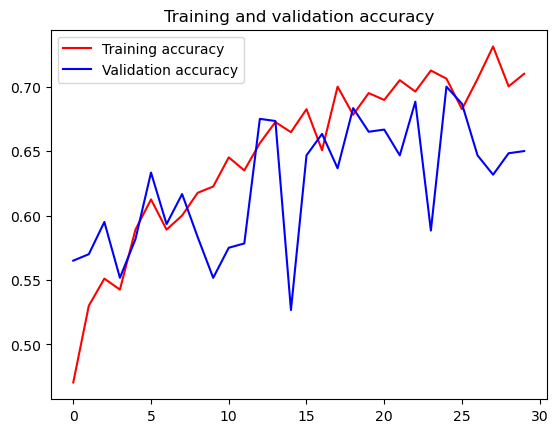

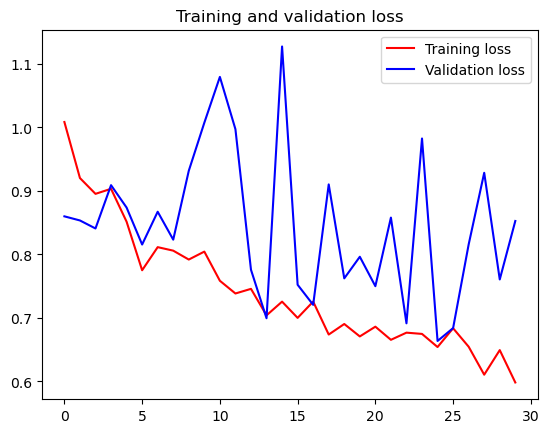

In [23]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()